## fist section

In [11]:
from IPython.display import Image

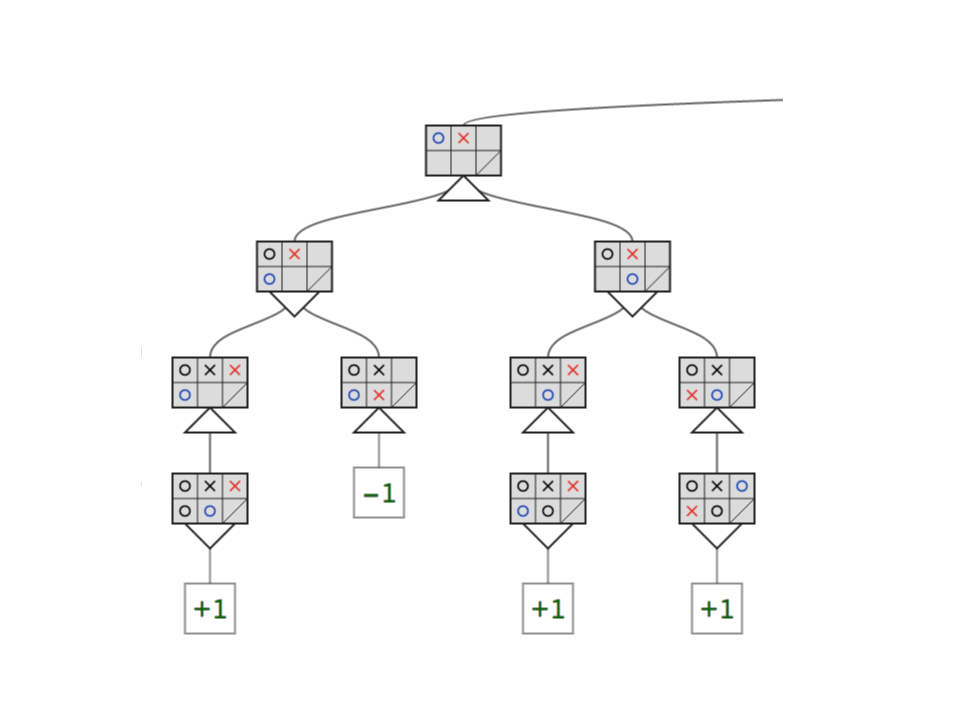

In [13]:
Image("7908a046-141f-4294-aec8-a2496841f465.png")

In [6]:
from copy import deepcopy

xlim, ylim = 3, 2  # board dimensions

class GameState:
    """
    Attributes
    ----------
    _board: list(list)
        Represent the board with a 2d array _board[x][y]
        where open spaces are 0 and closed spaces are 1
    
    _parity: bool
        Keep track of active player initiative (which
        player has control to move) where 0 indicates that
        player one has initiative and 1 indicates player 2
    
    _player_locations: list(tuple)
        Keep track of the current location of each player
        on the board where position is encoded by the
        board indices of their last move, e.g., [(0, 0), (1, 0)]
        means player 1 is at (0, 0) and player 2 is at (1, 0)
    
    """

    def __init__(self):
        self._board = [[0] * ylim for _ in range(xlim)]
        self._board[-1][-1] = 1  # block lower-right corner
        self._parity = 0
        self._player_locations = [None, None]

    def forecast_move(self, move):
        """ Return a new board object with the specified move
        applied to the current game state.
        
        Parameters
        ----------
        move: tuple
            The target position for the active player's next move
        """
        if move not in self.get_legal_moves():
            raise RuntimeError("Attempted forecast of illegal move")
        newBoard = deepcopy(self)
        newBoard._board[move[0]][move[1]] = 1
        newBoard._player_locations[self._parity] = move
        newBoard._parity ^= 1
        return newBoard

    def get_legal_moves(self):
        """ Return a list of all legal moves available to the
        active player.  Each player should get a list of all
        empty spaces on the board on their first move, and
        otherwise they should get a list of all open spaces
        in a straight line along any row, column or diagonal
        from their current position. (Players CANNOT move
        through obstacles or blocked squares.)
        """
        loc = self._player_locations[self._parity]
        if not loc:
            return self._get_blank_spaces()
        moves = []
        rays = [(1, 0), (1, -1), (0, -1), (-1, -1),
                (-1, 0), (-1, 1), (0, 1), (1, 1)]
        for dx, dy in rays:
            _x, _y = loc
            while 0 <= _x + dx < xlim and 0 <= _y + dy < ylim:
                _x, _y = _x + dx, _y + dy
                if self._board[_x][_y]:
                    break
                moves.append((_x, _y))
        return moves

    def _get_blank_spaces(self):
        """ Return a list of blank spaces on the board."""
        return [(x, y) for y in range(ylim) for x in range(xlim)
                if self._board[x][y] == 0]

In [7]:
# test code
#from gamestate import *

print("Creating empty game board...")
g = GameState()

print("Getting legal moves for player 1...")
p1_empty_moves = g.get_legal_moves()
print("Found {} legal moves.".format(len(p1_empty_moves or [])))

print("Applying move (0, 0) for player 1...")
g1 = g.forecast_move((0, 0))

print("Getting legal moves for player 2...")
p2_empty_moves = g1.get_legal_moves()
if (0, 0) in set(p2_empty_moves):
    print("Failed\n  Uh oh! (0, 0) was not blocked properly when " +
          "player 1 moved there.")
else:
    print("Everything looks good!")

Creating empty game board...
Getting legal moves for player 1...
Found 5 legal moves.
Applying move (0, 0) for player 1...
Getting legal moves for player 2...
Everything looks good!


## second section

In [14]:
# minimax_helpers

def terminal_test(gameState):
    """ Return True if the game is over for the active player
    and False otherwise.
    """
    return not bool(gameState.get_legal_moves())  # by Assumption 1


def min_value(gameState):
    """ Return the value for a win (+1) if the game is over,
    otherwise return the minimum value over all legal child
    nodes.
    """
    if terminal_test(gameState):
        return 1  # by Assumption 2
    v = float("inf")
    for m in gameState.get_legal_moves():
        v = min(v, max_value(gameState.forecast_move(m)))
    return v


def max_value(gameState):
    """ Return the value for a loss (-1) if the game is over,
    otherwise return the maximum value over all legal child
    nodes.
    """
    if terminal_test(gameState):
        return -1  # by assumption 2
    v = float("-inf")
    for m in gameState.get_legal_moves():
        v = max(v, min_value(gameState.forecast_move(m)))
    return v



In [15]:
# minimax

#from minimax_helpers import *

# Solution using an explicit loop based on max_value()
def _minimax_decision(gameState):
    """ Return the move along a branch of the game tree that
    has the best possible value.  A move is a pair of coordinates
    in (column, row) order corresponding to a legal move for
    the searching player.
    
    You can ignore the special case of calling this function
    from a terminal state.
    """
    best_score = float("-inf")
    best_move = None
    for m in gameState.get_legal_moves():
        v = min_value(gameState.forecast_move(m))
        if v > best_score:
            best_score = v
            best_move = m
    return best_move


# This solution does the same thing using the built-in `max` function
# Note that "lambda" expressions are Python's version of anonymous functions
def minimax_decision(gameState):
    """ Return the move along a branch of the game tree that
    has the best possible value.  A move is a pair of coordinates
    in (column, row) order corresponding to a legal move for
    the searching player.
    
    You can ignore the special case of calling this function
    from a terminal state.
    """
    # The built in `max()` function can be used as argmax!
    return max(gameState.get_legal_moves(),
               key=lambda m: min_value(gameState.forecast_move(m)))



In [18]:
# NOTE: This function is provided for reference; it is not imported or used
# by the test code when you submit (this allows for dependency isolation
# in the test cases)

#import minimax_helpers

#from gamestate import *


#import minimax
#import gamestate as game


best_moves = set([(0, 0), (2, 0), (0, 1)])
rootNode = GameState()
minimax_move = minimax_decision(rootNode)

print("Best move choices: {}".format(list(best_moves)))
print("Your code chose: {}".format(minimax_move))

if minimax_move in best_moves:
    print("That's one of the best move choices. Looks like your minimax-decision function worked!")
else:
    print("Uh oh...looks like there may be a problem.")


Best move choices: [(0, 1), (2, 0), (0, 0)]
Your code chose: (0, 0)
That's one of the best move choices. Looks like your minimax-decision function worked!
